# Analyse et nettoyage du jeu de données 

### Chargement du fichier excel et transformation de chaque feuille en csv

In [1]:
import pandas as pd

# Chemin vers le fichier Excel d'entrée
excel_file_path = 'online_retail_II.xlsx'

# Charger le fichier Excel en utilisant pandas
xls = pd.ExcelFile(excel_file_path)

# Parcourir chaque feuille de calcul du fichier Excel
for sheet_name in xls.sheet_names:
    # Charger la feuille de calcul en tant que dataframe
    data_frame = xls.parse(sheet_name)
    
    # Chemin vers le fichier CSV de sortie
    csv_file_path = f'online_retail{sheet_name}.csv'
    
    # Convertir le dataframe en fichier CSV
    data_frame.to_csv(csv_file_path, index=False, encoding='utf-8')
    
print('Conversion terminée.')


Conversion terminée.


### Concaténation des deux feuilles en un fichier csv

In [2]:
import pandas as pd

# Chemin vers le premier fichier CSV
csv_file1 = 'online_retailYear 2009-2010.csv'

# Chemin vers le deuxième fichier CSV
csv_file2 = 'online_retailYear 2010-2011.csv'

# Charger les deux fichiers CSV en utilisant pandas
data_frame1 = pd.read_csv(csv_file1)
data_frame2 = pd.read_csv(csv_file2)

# Concaténer les deux dataframes
concatenated_data = pd.concat([data_frame1, data_frame2])

# Chemin vers le fichier CSV de sortie
output_csv = 'online_retail.csv'

# Enregistrer le dataframe concaténé en tant que fichier CSV
concatenated_data.to_csv(output_csv, index=False)

print('Concaténation terminée.')


Concaténation terminée.


## Nettoyage des données

In [3]:
df_ukretail = pd.read_csv('online_retail.csv')

In [4]:
df_ukretail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [5]:
df_ukretail.shape

(1067371, 8)

In [6]:
df_ukretail.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### Identifier les valeurs manquantes

In [7]:
nan_count = df_ukretail.isna().sum()
print(nan_count.sort_values)

<bound method Series.sort_values of Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64>


Garde-t-on les lignes où le client n'est pas identifié ? Sachant qu'on cherche à classifier les clients. Nous faisons le choix de les supprimer.

In [8]:
df_ukretail = df_ukretail.dropna(subset=['Customer ID'])

### Identifier les doublons

Il existe des lignes identiques, mais on ne sait pas si ce sont réellement des doublons ou si cela peut s'expliquer par d'autres informations dont on ne dispose pas. Nous choisissons donc je garder les lignes.

### Conversion des types

In [9]:
df_ukretail['Customer ID'] = df_ukretail['Customer ID'].astype('str')

### Consistance des données

In [10]:
df_ukretail.describe()

,Quantity,Price
count,824364.000000,824364.000000
mean,12.414574,3.676800
std,188.976099,70.241388
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [11]:
df_ukretail = df_ukretail[df_ukretail['Quantity']> 0]
df_ukretail = df_ukretail[df_ukretail['Price']> 0]

In [12]:
df_ukretail.describe()

,Quantity,Price
count,805549.000000,805549.000000
mean,13.290522,3.206561
std,143.634088,29.199173
min,1.000000,0.001000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,10953.500000


In [13]:
nan_count = df_ukretail.isna().sum()
print(nan_count.sort_values)

<bound method Series.sort_values of Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64>


Nous supprimons les lignes où le stockcode est composé uniquement de lettres pour ne pas prendre en compte tout ce qui concerne les frais de port, qui ne donnent pas de renseignements sur le client.

In [14]:
# Appliquer le filtrage sur la colonne "stock code"
df_ukretail = df_ukretail[~df_ukretail['StockCode'].str.match(r'^[A-Za-z]')]

In [15]:
df_ukretail.describe()

,Quantity,Price
count,802632.000000,802632.000000
mean,13.319211,2.930763
std,143.868968,4.275915
min,1.000000,0.030000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,649.500000


### Feature engineering

On peut ajouter une colonne qui nous donne le prix unitaire multiplié par la quantité.

In [16]:
df_ukretail['total'] = df_ukretail['Quantity']*df_ukretail['Price']

### Group by

In [17]:
df_gp_invoice = df_ukretail.groupby('Invoice').sum().drop('Price',axis=1)
df_gp_invoice

/tmp/ipykernel_109360/2032283763.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp_invoice = df_ukretail.groupby('Invoice').sum().drop('Price',axis=1)


,Quantity,total
Invoice,,
489434,166,505.30
489435,60,145.80
489436,193,630.33
489437,145,310.75
489438,826,2286.24
...,...,...
581583,76,124.60
581584,120,140.64
581585,278,329.05


In [18]:
df_gp_customer = df_ukretail.groupby('Customer ID').sum().drop('Price',axis=1)
df_gp_customer

/tmp/ipykernel_109360/3818432416.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_gp_customer = df_ukretail.groupby('Customer ID').sum().drop('Price',axis=1)


,Quantity,total
Customer ID,,
12346.0,74239,77352.96
12347.0,3286,5633.32
12348.0,2704,1658.40
12349.0,1621,3678.69
12350.0,196,294.40
...,...,...
18283.0,1731,2730.70
18284.0,493,411.68
18285.0,144,377.00


In [19]:
df_rfm = df_ukretail.groupby('Customer ID').agg({'Invoice': 'nunique', 'InvoiceDate': 'max', 'total':'sum'})
df_rfm

,Invoice,InvoiceDate,total
Customer ID,,,
12346.0,3,2011-01-18 10:01:00,77352.96
12347.0,8,2011-12-07 15:52:00,5633.32
12348.0,5,2011-09-25 13:13:00,1658.40
12349.0,3,2011-11-21 09:51:00,3678.69
12350.0,1,2011-02-02 16:01:00,294.40
...,...,...,...
18283.0,22,2011-12-06 12:02:00,2730.70
18284.0,1,2010-10-04 11:33:00,411.68
18285.0,1,2010-02-17 10:24:00,377.00


In [20]:
from datetime import datetime

# Convertir la colonne de dates en format datetime
df_rfm['InvoiceDate'] = pd.to_datetime(df_rfm['InvoiceDate'])

# Calculer le nombre de jours depuis la dernière commande
date_str = '2011-12-10 00:00:00'
date_format = '%Y-%m-%d %H:%M:%S'

date_obj = datetime.strptime(date_str, date_format)
df_rfm['Recency'] = (date_obj - df_rfm['InvoiceDate']).dt.days
df_rfm


,Invoice,InvoiceDate,total,Recency
Customer ID,,,,
12346.0,3,2011-01-18 10:01:00,77352.96,325
12347.0,8,2011-12-07 15:52:00,5633.32,2
12348.0,5,2011-09-25 13:13:00,1658.40,75
12349.0,3,2011-11-21 09:51:00,3678.69,18
12350.0,1,2011-02-02 16:01:00,294.40,310
...,...,...,...,...
18283.0,22,2011-12-06 12:02:00,2730.70,3
18284.0,1,2010-10-04 11:33:00,411.68,431
18285.0,1,2010-02-17 10:24:00,377.00,660


In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Sélectionner les variables pour la segmentation
variables = ['Invoice', 'total','Recency']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Choix du nombre de clusters (k)
k = 4

# Appliquer l'algorithme K-means
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Ajouter les informations de segmentation au dataframe d'origine
df_rfm['Segment'] = kmeans.labels_

# Analyser les caractéristiques des clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
df_cluster_centers = pd.DataFrame(cluster_centers, columns=variables)
print(df_cluster_centers)


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      Invoice          total     Recency
0    7.215216    2938.575563   66.959354
1    2.196247     736.404391  461.932556
2  201.750000  428951.602500    2.750000
3   99.052632   78636.871053   23.736842


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

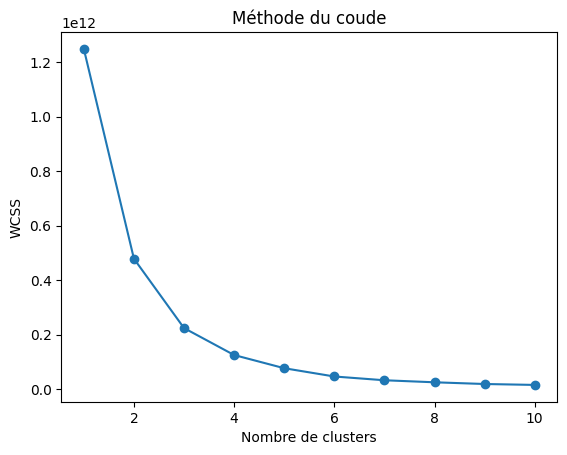

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist


variables = ['Invoice', 'total','Recency']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Liste pour stocker les valeurs des indices de performance (WCSS) pour différents nombres de clusters
wcss = []

# Définir une plage de valeurs pour le nombre de clusters à tester
range_clusters = range(1, 11)

# Appliquer K-means pour différents nombres de clusters et calculer l'indice de performance (WCSS)
for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Tracer la courbe de la méthode du coude
plt.plot(range_clusters, wcss, marker='o')
plt.xlabel('Nombre de clusters')
plt.ylabel('WCSS')
plt.title('Méthode du coude')
plt.show()


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


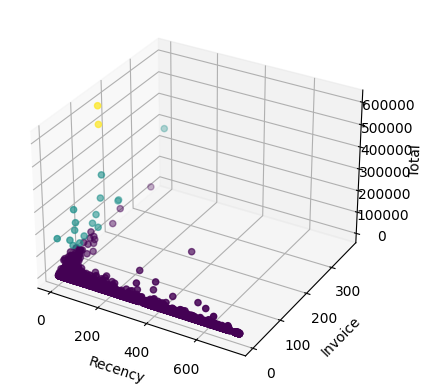

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans


variables = ['Invoice', 'total','Recency']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer K-means pour obtenir les clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtenir les labels des clusters
labels = kmeans.labels_

# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Tracer les points de données avec les couleurs des clusters
ax.scatter(X['Recency'], X['Invoice'], X['total'], c=labels, cmap='viridis')

# Ajouter des labels aux axes
ax.set_xlabel('Recency')
ax.set_ylabel('Invoice')
ax.set_zlabel('Total')

# Afficher la figure
plt.show()


/home/apprenant/miniconda3/envs/sklearn-env/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


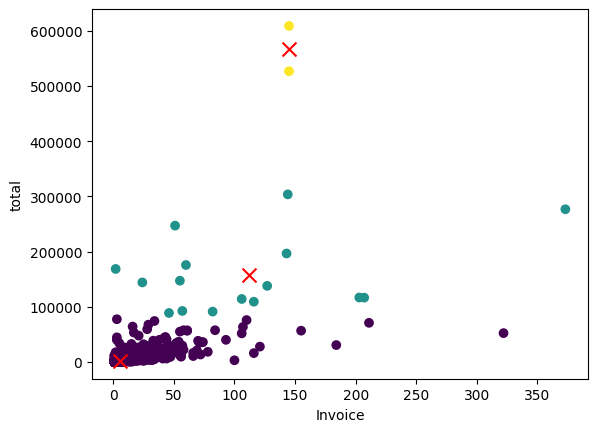

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


variables = ['Invoice', 'total']

# Préparer les données et effectuer la normalisation
X = df_rfm[variables]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Appliquer K-means pour obtenir les clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

# Obtenir les labels des clusters
labels = kmeans.labels_

# Obtenir les coordonnées des centroïdes
centroids = kmeans.cluster_centers_




# Tracer les points de données avec les couleurs des clusters
plt.scatter(X['Invoice'], X['total'], c=labels, cmap='viridis',rasterized=False)

# Tracer les centroïdes des clusters
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red', s=100)

# Ajouter des labels aux axes
plt.xlabel('Invoice')
plt.ylabel('total')

# Afficher la figure
plt.show()


In [25]:
import plotly.express as px
df_rfm["Segment"] = df_rfm["Segment"].astype(str) #convert to string
fig = px.scatter_3d(df_rfm, x='Recency', y='Invoice', z='total',
              color='Segment')
fig.update_layout(width=800, height=600)
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed